    Duration  Pulse  Maxpulse  Calories
0         60    110       130     409.1
1         60    117       145     479.0
2         60    103       135     340.0
3         45    109       175     282.4
4         45    117       148     406.0
5         60    102       127     300.0
6         60    110       136     374.0
7         45    104       134     253.3
8         30    109       133     195.1
9         60     98       124     269.0
10        60    103       147     329.3
11        60    100       120     250.7
12        60    106       128     345.3
13        60    104       132     379.3
14        60     98       123     275.0
15        60     98       120     215.1
16        45     90       112     199.8
17        60    103       123     323.0
18        45     97       125     243.0
19        60    108       131     364.4
20        45    100       119     282.0
21        60    130       101     300.0
22        45    105       132     246.0
23        60    102       126     334.5


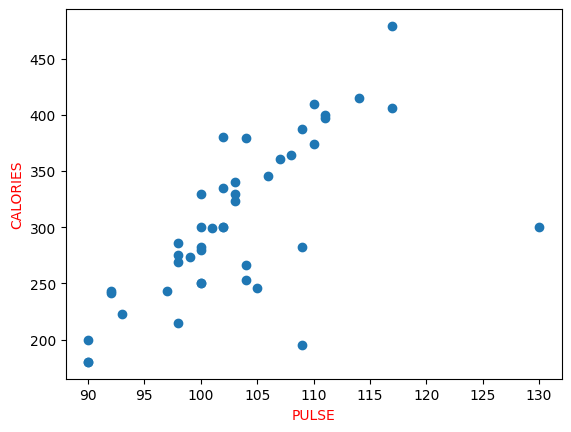

In [3]:
# IMPORT IMPORTANT LIBARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

# LOAD THE DATSETS

df=pd.read_csv("calories.csv")
cal=pd.DataFrame(df)
print(cal)

# EXPLORE DATA ANALYSIS

cal.head()
cal.shape
print(cal.corr())
print(cal.describe())

# PREPRPCESSING 

x=cal["Pulse"].values.reshape(-1,1)
y=cal["Calories"].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train)
print(y_train)

# TRAINING THE MODEL

reg=LinearRegression()
reg.fit(x,y)
print(reg.intercept_)
print(reg.coef_)

# PREDICTIONS

score=reg.predict([[113]])
print(score)

def calc(slope,intercept,value):
    return slope*value+intercept

score=calc(reg.coef_,reg.intercept_,113)
print(score)

y_pred=reg.predict(x_test)
df_pred=pd.DataFrame({"actual":y_test.squeeze(),"predicted":y_pred.squeeze()})
print(df_pred)

# EVALUATING THE MODEL

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r=np.sqrt(mse)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R sqaured:",r)

# VISUVALIZATION OF THE MODEL

plt.scatter(x,y)
plt.xlabel("PULSE",color="red")
plt.ylabel("CALORIES",color="red")
plt.show()

